# Mean field

In [1]:
# Initiialization code
%matplotlib inline
import numpy as np
# from pylab import imshow, show, get_cmap, imread, figure, subplots, title
from numpy import random
import matplotlib.pyplot as plt
import time
from IPython.display import display, clear_output

original range: 0.00561378787879 0.770716255013
remaped range: -1.0 1.0


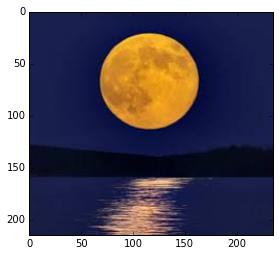

In [2]:
# Load and preprocess data
im = plt.imread('../data/gibbs/gibbs_demo.jpg')
im = plt.imread('../data/gibbs/moon.jpg')
plt.imshow(im)

def myimshow(state):
    plt.imshow(state, interpolation='nearest')

# Preprocess image to range (-1, 1)
def preproc_data(im, scale=0.1, debug=False):
    import skimage.color
    import skimage.transform
    
    tinyim = skimage.transform.rescale(im, scale)
    grayim = skimage.color.rgb2gray(tinyim)

    # Linear map the data to -1, 1
    scale = grayim.max() - grayim.min()
    data = 2 * (grayim -grayim.min()) / scale - 1 
    # data = (grayim - grayim.min()) / scale
    if debug:
        print 'original range:', grayim.min(), grayim.max()
        print 'remaped range:', data.min(), data.max()

    return [data, tinyim]

[I, im] = preproc_data(im, debug=True) # data is normalized image

Update rule for $ u_i $

$$ \frac{d u_i}{d t} = - u_i + \sum_j W_{ij} I_{j} + \sum_k \theta_{ik} q_k $$

$$ q_i = \sigma(u_i) $$

$ W_{ij} $ and $ \theta_{ik} $ is predefined, $ W_{ij} $ relates to data term, $ \theta_{ik} $ relates to smoothness term.

The definition of free energy is

$$ F(q) = - \sum_{ij} W_{ij} I_{j} q_{i} - \frac{1}{2} \sum_{ij} \theta_{ij} q_i q_j + \sum_i { q_i \log q_i + (1 - q_i) log (1 - q_i)} $$

$ u_i \in \{ -\infty, \infty \} $, $ q_i \in \{ 0, 1 \} $

# Mean field free energy

In [3]:
def F(Q, I, W, Theta):
    E = 0
    E += - np.sum(W * I * Q)
    E += - 1/2 * np.sum(np.roll(Q, 1, axis=0) * Q + np.roll(Q, -1, axis=0) * Q +
    np.roll(Q, 1, axis=1) * Q + np.roll(Q, -1, axis=1) * Q)
    E += np.sum(Q * np.log(Q) + (1-Q) * np.log(1-Q))
    return E

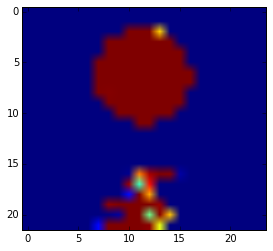

-1236.18771557


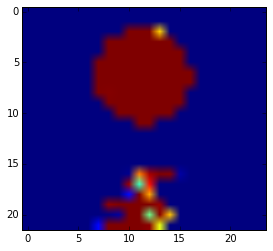

In [4]:
U = np.ones(I.shape)
Theta = 1* np.ones(I.shape) # smoothness
W = 20 * np.ones(I.shape) # data term
# logistic
def logit(x):
    y = 1 / (1 + np.exp(-x))
    return y

f, ax = plt.subplots() # prepare animation
for i in np.arange(2):
    Q = logit(U)
    neighbor = np.roll(Q, 1, axis=0) + np.roll(Q, -1, axis=0)
    np.roll(Q, 1, axis=1) + np.roll(Q, -1, axis=1)
    dU = - U + I * W + neighbor * Theta
    U = dU + U
    # time.sleep(1)
    clear_output(wait=True)

    plt.imshow(Q)
    display(f)
    print F(Q, I, W, Theta)
    
# clear_output(wait=True)

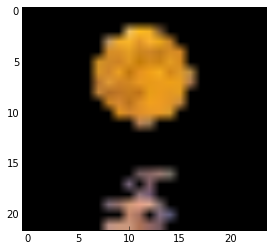

In [5]:
mask = Q>0.5
fg = im.copy()
for i in np.arange(3):
    fg[:,:,i] = fg[:,:,i] * (Q>0.5)
plt.imshow(fg)